In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
from keras.layers.normalization import BatchNormalization

from read_dataset import read_ceps_with_train_test
import numpy as np
from create_data_ceps import createCepsSS
from read_saved_models import loadCepsStanderdScaler

from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
X_train, X_test, y_train, y_test = read_ceps_with_train_test()

In [3]:
def getStanderizedData(data):
    data_shape = data.shape
    n = data_shape[0]
    reshaped_data = data.reshape(n, -1)
    saved_ss = loadCepsStanderdScaler()
    trasformed_data = saved_ss.transform(reshaped_data)
    ret_data = trasformed_data.reshape(data_shape)
    return ret_data

In [4]:
X_ss_train = getStanderizedData(X_train)
X_ss_test = getStanderizedData(X_test)

In [5]:
layer_1_outdim = 600
layer_1_dropout = 0.5
layer_2_outdim = 300
layer_2_dropout = 0.5
layer_3_outdim = 200
layer_3_dropout = 0.4
layer_4_outdim = 100
layer_4_dropout = 0.3

In [6]:
model = Sequential()

# this layerf from https://keras.io/getting-started/sequntial-model-guide/
# Dense(64) is fully-connected layer with 64 hidden units
model.add(Dense(layer_1_outdim, activation='relu', input_dim=20))
model.add(Dropout(layer_1_dropout))
model.add(BatchNormalization())

model.add(Dense(layer_2_outdim, activation='relu'))
model.add(Dropout(layer_2_dropout))
model.add(BatchNormalization())

model.add(Dense(layer_3_outdim, activation='relu'))
model.add(Dropout(layer_3_dropout))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

# sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.01, decay=1e-7)

model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])
epoch = 20

In [7]:
result = model.fit(X_ss_train, y_train, epochs=epoch, batch_size=100,  validation_split=0.2)

Train on 480 samples, validate on 120 samples
Epoch 1/20
480/480 [==============================] - 3s - loss: 2.4733 - acc: 0.2271 - val_loss: 2.2308 - val_acc: 0.2833
Epoch 2/20
480/480 [==============================] - 0s - loss: 1.8626 - acc: 0.3979 - val_loss: 3.5079 - val_acc: 0.3000
Epoch 3/20
480/480 [==============================] - 0s - loss: 1.6761 - acc: 0.4271 - val_loss: 4.7157 - val_acc: 0.2917
Epoch 4/20
480/480 [==============================] - 0s - loss: 1.4563 - acc: 0.4771 - val_loss: 4.1115 - val_acc: 0.3000
Epoch 5/20
480/480 [==============================] - 0s - loss: 1.3230 - acc: 0.5313 - val_loss: 3.6168 - val_acc: 0.3250
Epoch 6/20
480/480 [==============================] - 0s - loss: 1.3198 - acc: 0.5125 - val_loss: 3.2980 - val_acc: 0.3667
Epoch 7/20
480/480 [==============================] - 0s - loss: 1.1933 - acc: 0.5396 - val_loss: 2.7237 - val_acc: 0.4000
Epoch 8/20
480/480 [==============================] - 0s - loss: 1.1857 - acc: 0.5604 - val_l

100/400 [======>.......................] - ETA: 0s
['loss', 'acc']
[1.2371015846729279, 0.56749999523162842]


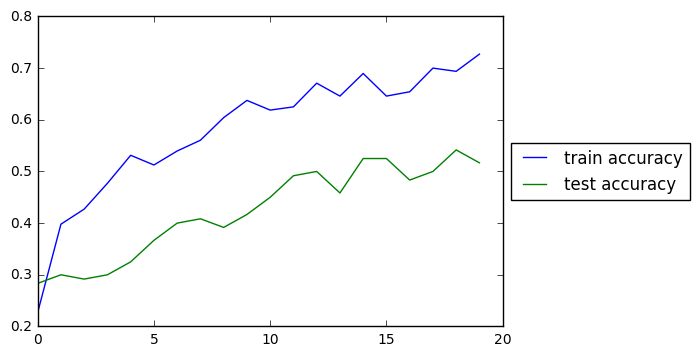

In [8]:
x = range(epoch)
plt.plot(x, result.history['acc'], label='train accuracy')
plt.plot(x, result.history['val_acc'], label='test accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

score = model.evaluate(X_ss_test, y_test, batch_size=100)
print("")
print(model.metrics_names)
print(score)

In [9]:
model_filepath = "./savedModels/ceps_standerized_dense_model.h5"
model.save(model_filepath)

In [10]:
"""
note

---
layer_1_outdim = 100
layer_1_dropout = 0.5
layer_2_outdim = 100
layer_2_dropout = 0.4
layer_3_outdim = 50
layer_3_dropout = 0.5
loss: 1.3307 - acc: 0.5479 - val_loss: 1.4328 - val_acc: 0.4250
test['loss', 'acc'][1.3474427759647369, 0.51999998837709427]
---

"""

"\nnote\n\n---\nlayer_1_outdim = 100\nlayer_1_dropout = 0.5\nlayer_2_outdim = 100\nlayer_2_dropout = 0.4\nlayer_3_outdim = 50\nlayer_3_dropout = 0.5\nloss: 1.3307 - acc: 0.5479 - val_loss: 1.4328 - val_acc: 0.4250\ntest['loss', 'acc'][1.3474427759647369, 0.51999998837709427]\n---\n\n"

In [11]:
file_path = "../data/songData/genres/disco/disco.00006.ceps.npy"
ceps = np.load(file_path)

t_ceps = ceps.transpose()
t_num_ceps = len(t_ceps)
t_ceps_mean = np.mean(t_ceps[int(t_num_ceps / 10):int(t_num_ceps * 9 / 10)], axis=0)
predict_data = np.array([t_ceps_mean])
predict_data = getStanderizedData(predict_data)

In [12]:
predict_result = model.predict(predict_data)
print(predict_result)
print(np.argmax(predict_result))

[[ 0.02450029  0.00282325  0.06668147  0.26487291  0.00333071  0.0019709
   0.11277793  0.00311872  0.00812419  0.51179969]]
9
